In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

from xgboost import XGBClassifier

import lightgbm as lgb

from sklearn.ensemble import VotingClassifier

In [74]:
df = pd.read_csv("data\prain.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [75]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [76]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [78]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


Lower Bound:20.0
Upper Bound=75.0


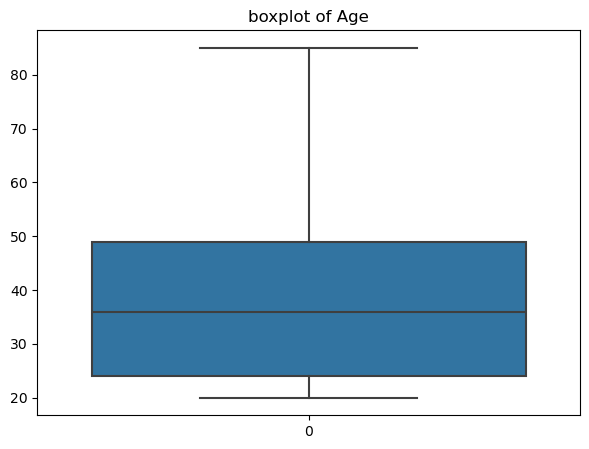

Lower Bound:2630.0
Upper Bound=66714.0


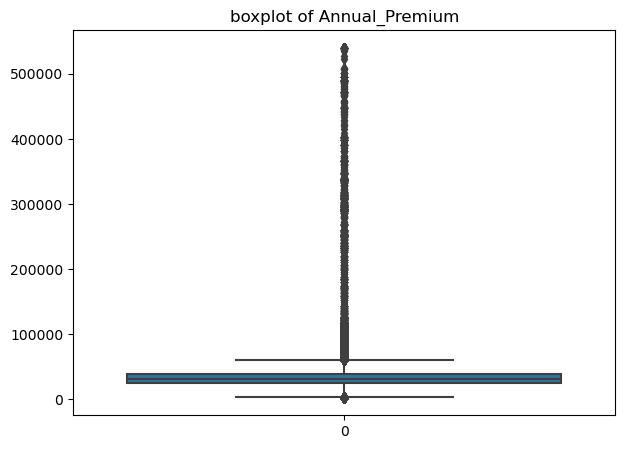

Lower Bound:14.0
Upper Bound=297.0


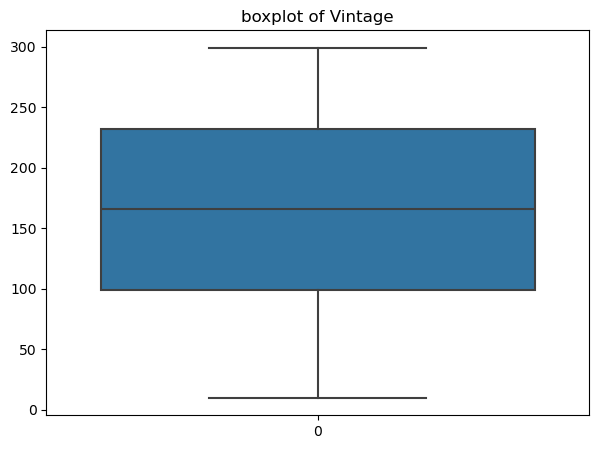

In [79]:
for feature in ['Age','Annual_Premium','Vintage']:
  print(f"Lower Bound:{df[feature].quantile(0.01)}\nUpper Bound={df[feature].quantile(0.99)}")
  plt.figure(figsize=(7,5))
  sns.boxplot(df[feature])
  plt.title(f"boxplot of {feature}")
  plt.show()


In [80]:
df = pd.get_dummies(df,columns=['Gender','Vehicle_Age',"Vehicle_Damage"])

In [81]:
scaler = StandardScaler()
df[['Age','Annual_Premium',"Vintage","Policy_Sales_Channel","Region_Code"]]=scaler.fit_transform(df[['Age','Annual_Premium',"Vintage","Policy_Sales_Channel","Region_Code"]])

In [82]:
df.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Female', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [83]:
df.rename(columns = {'Vehicle_Age_< 1 Year': 'Vehicle Age Less than 1 yr',
                           'Vehicle_Age_1-2 Year': 'Vehicle Age between 1 and 2 yrs',
                           'Vehicle_Age_> 2 Years': 'Vehicle Age greater than 2 yrs'
                          }, inplace = True)

In [84]:
df.columns


Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response',
       'Gender_Female', 'Gender_Male', 'Vehicle Age between 1 and 2 yrs',
       'Vehicle Age Less than 1 yr', 'Vehicle Age greater than 2 yrs',
       'Vehicle_Damage_No', 'Vehicle_Damage_Yes'],
      dtype='object')

In [85]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle Age between 1 and 2 yrs,Vehicle Age Less than 1 yr,Vehicle Age greater than 2 yrs,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,-1.159410,1,0.660528,0,2.105145,0.214202,0.288852,0,False,True,True,False,False,False,True
1,1,0.307897,1,0.121718,0,1.728962,-1.599414,1.551675,1,False,True,False,False,True,False,True
2,2,-0.892627,1,-0.955902,1,0.460756,0.732378,1.126566,0,True,False,False,True,False,True,False
3,3,-0.225669,1,-1.956550,0,-1.691389,0.806403,-1.099003,0,True,False,True,False,False,False,True
4,4,-0.158974,1,-0.878929,1,0.090529,0.732378,1.626694,0,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0.641376,1,-1.571685,0,-0.185319,-1.599414,0.676451,0,False,True,True,False,False,False,True
11504794,11504794,-0.825931,1,0.737501,0,-0.057878,0.732378,-0.611378,1,True,False,False,True,False,False,True
11504795,11504795,-0.625844,1,0.429609,1,-1.691389,0.732378,0.313859,0,True,False,False,True,False,True,False
11504796,11504796,0.841463,1,0.121718,0,1.092793,-1.599414,1.376630,1,True,False,True,False,False,False,True


In [86]:
df.iloc[:, -8:] = df.iloc[:, -8:].astype(int)

In [87]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle Age between 1 and 2 yrs,Vehicle Age Less than 1 yr,Vehicle Age greater than 2 yrs,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,-1.159410,1,0.660528,0,2.105145,0.214202,0.288852,0,0,1,1,0,0,0,1
1,1,0.307897,1,0.121718,0,1.728962,-1.599414,1.551675,1,0,1,0,0,1,0,1
2,2,-0.892627,1,-0.955902,1,0.460756,0.732378,1.126566,0,1,0,0,1,0,1,0
3,3,-0.225669,1,-1.956550,0,-1.691389,0.806403,-1.099003,0,1,0,1,0,0,0,1
4,4,-0.158974,1,-0.878929,1,0.090529,0.732378,1.626694,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,0.641376,1,-1.571685,0,-0.185319,-1.599414,0.676451,0,0,1,1,0,0,0,1
11504794,11504794,-0.825931,1,0.737501,0,-0.057878,0.732378,-0.611378,1,1,0,0,1,0,0,1
11504795,11504795,-0.625844,1,0.429609,1,-1.691389,0.732378,0.313859,0,1,0,0,1,0,1,0
11504796,11504796,0.841463,1,0.121718,0,1.092793,-1.599414,1.376630,1,1,0,1,0,0,0,1


In [88]:
X_train = df.drop(['id', 'Response'], axis = 1)
y_train = df['Response']

In [89]:
# X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.8,random_state=42)

In [90]:
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))

10089739
1415059


In [91]:

xgb_model = XGBClassifier(scale_pos_weight = len(y_train[y_train ==0]) /len(y_train[y_train==1]) )
xgb_model.fit(X_train,y_train)

y_pred_xgb_train = xgb_model.predict_proba(X_train)[:,1]
train_auc_xgb = roc_auc_score(y_train ,y_pred_xgb_train)
print(f"Test AUC with XGBoost - {train_auc_xgb}")



Test AUC with XGBoost - 0.8790720623999267


In [92]:
lgb_model = lgb.LGBMClassifier(class_weight='balanced')
lgb_model.fit(X_train, y_train)

y_train_pred_proba_lgb = lgb_model.predict_proba(X_train)[:, 1]
train_auc_lgb = roc_auc_score(y_train, y_train_pred_proba_lgb)
print(f'Train AUC with LGBM: {train_auc_lgb}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1415059, number of negative: 10089739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.123471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 11504798, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Train AUC with LGBM: 0.8756982617464178


In [93]:
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg_model.fit(X_train, y_train)

y_train_pred_proba_logreg = logreg_model.predict_proba(X_train)[:, 1]
train_auc_logreg = roc_auc_score(y_train, y_train_pred_proba_logreg)
print(f'Train AUC with Logistic Regression: {train_auc_logreg}')

Train AUC with Logistic Regression: 0.8412060760368401


In [94]:
ensemble_model = VotingClassifier(estimators =[
  ('xgb',xgb_model),
  ('lgb', lgb_model),
  ('logreg', logreg_model)
], voting='soft')

ensemble_model.fit(X_train, y_train)

y_train_pred_proba_ensemble = ensemble_model.predict_proba(X_train)[:, 1]
train_auc_ensemble = roc_auc_score(y_train, y_train_pred_proba_ensemble)
print(f'Train AUC with Ensemble: {train_auc_ensemble}')




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1415059, number of negative: 10089739
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.136526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 11504798, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Train AUC with Ensemble: 0.8744099994684735


In [95]:
test_df = pd.read_csv('data\pest.csv')

In [96]:
test_df = pd.get_dummies(test_df, columns = ['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

scaler = StandardScaler()
test_df[['Age', 'Annual_Premium', 'Vintage']] = scaler.fit_transform(test_df[['Age', 'Annual_Premium', 'Vintage']])

In [97]:
test_df.rename(columns = {'Vehicle_Age_< 1 Year': 'Vehicle Age Less than 1 yr',
                           'Vehicle_Age_1-2 Year': 'Vehicle Age between 1 and 2 yrs',
                           'Vehicle_Age_> 2 Years': 'Vehicle Age greater than 2 yrs'
                          }, inplace = True)

In [98]:
X_test = test_df.drop(['id'], axis = 1)
test_id = test_df['id']

In [99]:
y_test_pred_prob_xgb = ensemble_model.predict_proba(X_test)[:, 1]

In [100]:
d = {'id': test_id, 'Response': y_test_pred_prob_xgb}
final_ans = pd.DataFrame(d, index = None)

In [101]:
final_ans.head(5)

,id,Response
0,11504798,0.125338
1,11504799,0.572335
2,11504800,0.461938
3,11504801,0.002420
4,11504802,0.258523


In [102]:
final_ans.to_csv('submission.csv', index = False)